## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "C:\\Users\\Cemen\\OneDrive\\Documents\\GitHub\\Matplotlib\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\Cemen\\OneDrive\\Documents\\GitHub\\Matplotlib\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
MouseCombine= pd.merge(mouse_metadata, study_results,how='outer', on="Mouse ID")
# Display the data table for preview
MouseCombine.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
TotalMice = MouseCombine["Mouse ID"].value_counts()
Mice = len(TotalMice)
Mice

249

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice =MouseCombine[MouseCombine.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mice_id = duplicated_mice["Mouse ID"].unique()
duplicated_mice_id

array(['g989'], dtype=object)

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate = MouseCombine[MouseCombine.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CleanDF= MouseCombine.loc[MouseCombine["Mouse ID"] != "g989",:]
CleanDF.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice in the clean DataFrame.
CleanMice = CleanDF["Mouse ID"].value_counts()
CleanMice = len(CleanMice)
CleanMice


248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
RegimenMean = CleanDF.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
RegimenMean

RegimenMedian = CleanDF.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
RegimenMedian

RegimenVar = CleanDF.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
RegimenVar

RegimenStd = CleanDF.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
RegimenStd

RegimenSEM = CleanDF.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
RegimenSEM

Summary= pd.DataFrame({"Mean": RegimenMean, "Median": RegimenMedian, "Variance":RegimenVar, "Standard Deviation": RegimenStd, "SEM": RegimenSEM})
Summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
AggSummary = CleanDF.groupby('Drug Regimen')
Summary2 = AggSummary.agg(['mean','median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
Summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

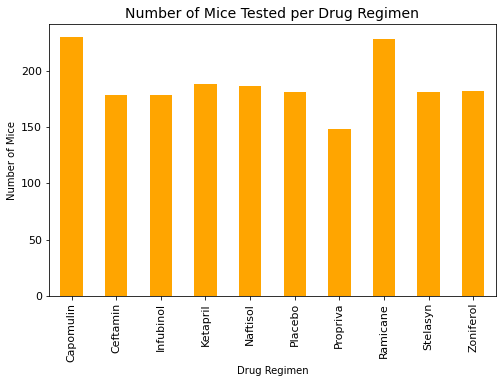

In [79]:
#Pandas
MiceBarPlot =CleanDF.groupby('Drug Regimen').count()['Mouse ID']
MiceBarPlot.plot.bar(figsize = (8,5), color = 'orange', fontsize = 11)


plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested per Drug Regimen", fontsize = 14)
plt.show()


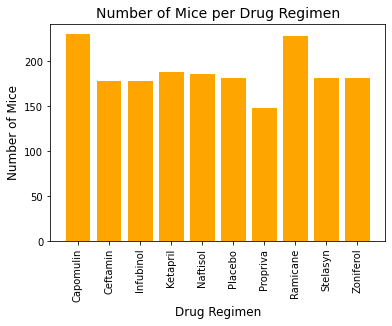

In [78]:
#Pyplot
MiceBarPlot.tolist()

#Set the x_axis 
x_axis = np.arange(len(bar_plot))
x_axis = bar_plot.index

plt.bar(x_axis, bar_plot, color = 'orange')

# Format bar chart
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Mice", fontsize = 12)
plt.title("Number of Mice per Drug Regimen", fontsize = 14)
plt.xticks(rotation=90)
plt.show()

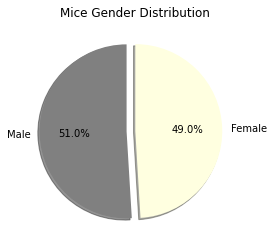

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

drop_duplicate = MouseCombine[MouseCombine["Mouse ID"].isin(duplicated_mice_id) == False]
gender = drop_duplicate['Sex'].value_counts()
sizes = gender.values 
labels = gender.values
gender.plot(kind="pie", colors = ['gray', 'lightyellow'], explode=(0.1,0), autopct="%1.1f%%", shadow=True, startangle=90)

 
plt.title("Mice Gender Distribution")
plt.ylabel(" ")
plt.show()

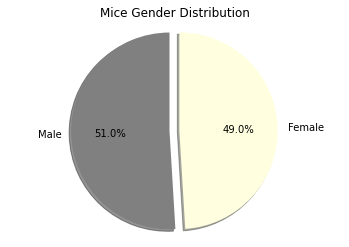

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
PyplotPie= drop_duplicate['Sex'].value_counts()


plt.pie(PyplotPie, labels = ["Male", "Female"], colors = ['gray', 'lightyellow'], explode=(0.1,0), autopct="%1.1f%%", shadow=True, startangle=90)

# Add title to chart, then display 
plt.title("Mice Gender Distribution")
plt.axis('equal')
plt.show()



In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Regimens = CleanDF[CleanDF["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
GreatestTimepoint = Regimens.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.merge(GreatestTimepoint, CleanDF, how="left", on =["Mouse ID", "Timepoint"])
tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [124]:
drug_list = ['Capomulin', 'Ceftamin', 'Infubinol','Ramicane']
              
# Create empty list to fill with tumor vol data (for plotting)
data_vol = []
    

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    drug_tumorvol = tumor_volume['Tumor Volume (mm3)'].loc[tumor_volume['Drug Regimen'] == drug]

    # add subset 
    data_vol.append(drug_tumorvol)
    
    # Determine outliers using upper and lower bounds

    quartiles = drug_tumorvol.quantile([.25,.5,.75])
    lowerq = (quartiles[0.25]).round()
    upperq = (quartiles[0.75]).round()
    iqr = (upperq-lowerq).round()
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
   
    lower_bound = (lowerq - (1.5*iqr))
    upper_bound = (upperq + (1.5*iqr))
    print(f'For {drug}, the upper bound is {upper_bound}')
    print(f'For {drug}, the lower bound is {lower_bound}\n')

For Capomulin, Interquartile Range (IQR) is 8.0
For Capomulin, the upper bound is 52.0
For Capomulin, the lower bound is 20.0

For Ceftamin, Interquartile Range (IQR) is 15.0
For Ceftamin, the upper bound is 86.5
For Ceftamin, the lower bound is 26.5

For Infubinol, Interquartile Range (IQR) is 12.0
For Infubinol, the upper bound is 84.0
For Infubinol, the lower bound is 36.0

For Ramicane, Interquartile Range (IQR) is 9.0
For Ramicane, the upper bound is 54.5
For Ramicane, the lower bound is 18.5



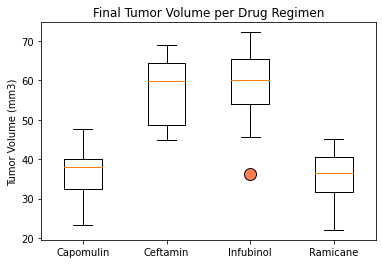

In [131]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
dot = dict(markerfacecolor='coral', marker='o', markersize=12)
# Plot
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Drug Regimen')
ax.set_xticklabels(drug_list)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(data_vol, flierprops = dot)
plt.show()

## Line and Scatter Plots

In [66]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
candidate = CleanDF.loc[CleanDF["Drug Regimen"] == "Capomulin"]    
#Select randomly using sample() without parameters (result ID f966)
candidate.sample()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
62,f966,Capomulin,Male,16,17,10,35.624403,0


Text(0.5, 0, 'Timepoint')

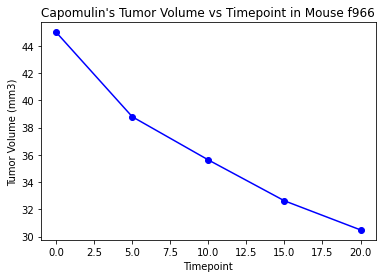

In [74]:
#Mouse ID f966 - line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
ID_f966 = CleanDF[['Timepoint', 'Tumor Volume (mm3)']] \
            .loc[(CleanDF['Drug Regimen'] == 'Capomulin') & (CleanDF['Mouse ID']=='f966')]


plt.plot(ID_f966['Timepoint'], ID_f966['Tumor Volume (mm3)'], color="blue", marker='o')
plt.title("Capomulin's Tumor Volume vs Timepoint in Mouse f966")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

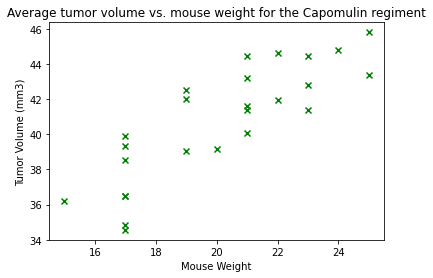

In [73]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = CleanDF.loc[CleanDF['Drug Regimen'] == 'Capomulin']
AvgVolume = weight.groupby(["Mouse ID"]).mean()

plt.scatter(AvgVolume["Weight (g)"],AvgVolume["Tumor Volume (mm3)"], color="green", marker='x') 
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average tumor volume vs. mouse weight for the Capomulin regiment")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
